In [1]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import yfinance as yf
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
from collections import Counter

C:\Users\kyse1\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
wine = fetch_ucirepo( id=186)
ozellikler_wine = wine['data']['features']
#wine["metadata"]
ozellikler_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
wine

{'data': {'ids': None,
  'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
  0               7.4              0.70         0.00             1.9      0.076   
  1               7.8              0.88         0.00             2.6      0.098   
  2               7.8              0.76         0.04             2.3      0.092   
  3              11.2              0.28         0.56             1.9      0.075   
  4               7.4              0.70         0.00             1.9      0.076   
  ...             ...               ...          ...             ...        ...   
  6492            6.2              0.21         0.29             1.6      0.039   
  6493            6.6              0.32         0.36             8.0      0.047   
  6494            6.5              0.24         0.19             1.2      0.041   
  6495            5.5              0.29         0.30             1.1      0.022   
  6496            6.0              0.21         0.38

In [4]:
wine.data.targets.quality

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

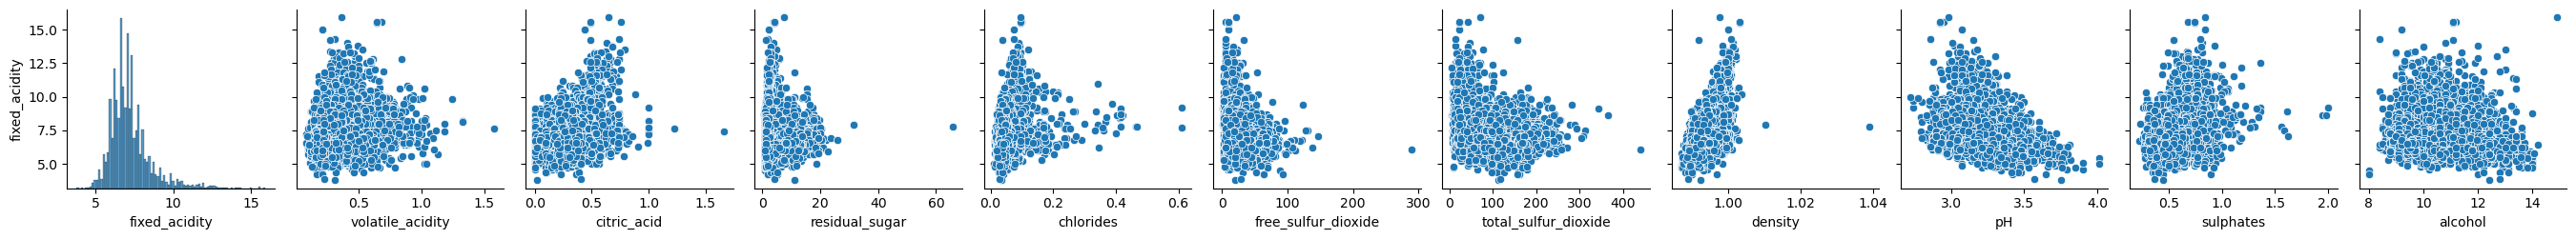

In [5]:
sns.pairplot(ozellikler_wine,y_vars="fixed_acidity")

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='density', ylabel='residual_sugar'>

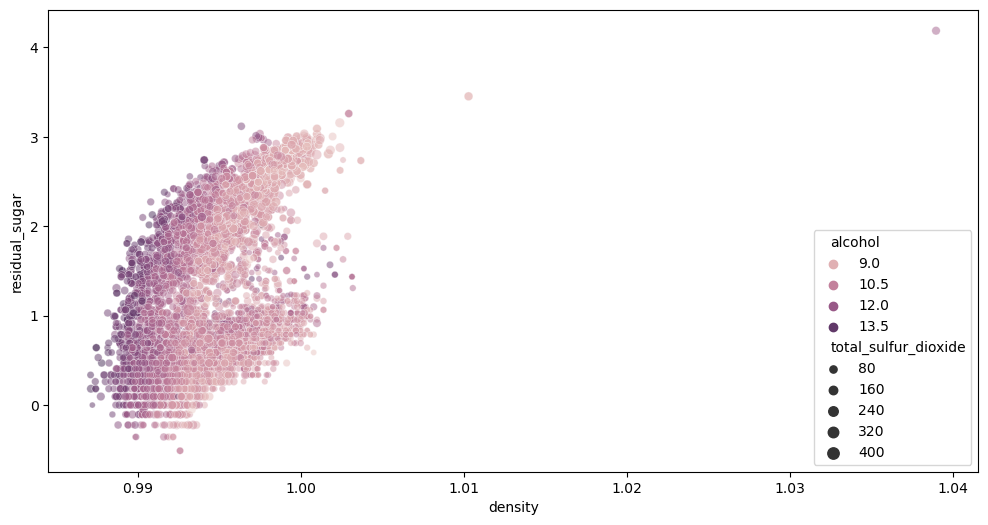

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=np.log(ozellikler_wine["residual_sugar"]),
                x=ozellikler_wine["density"],
                size=ozellikler_wine["total_sulfur_dioxide"],
                hue=ozellikler_wine["alcohol"],
                alpha=0.5)

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='citric_acid', ylabel='Count'>

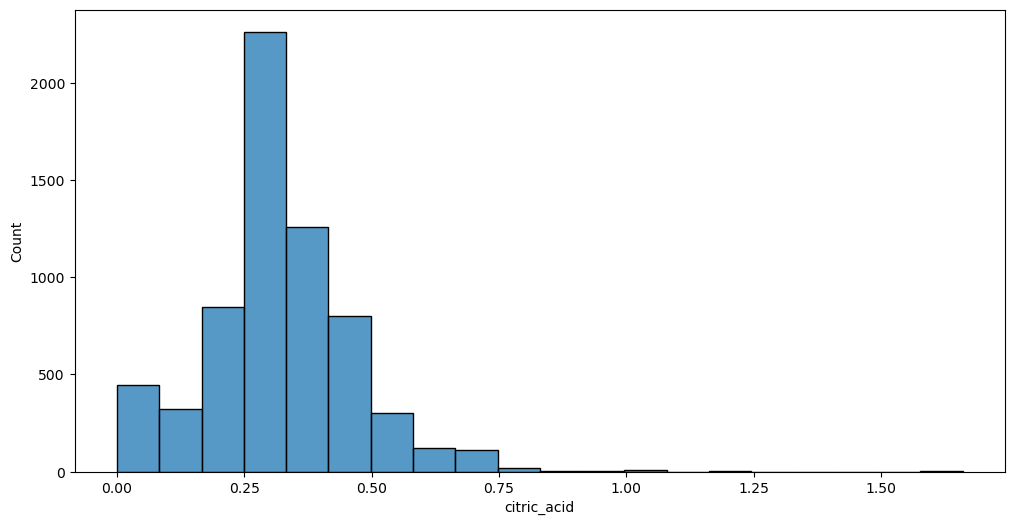

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(ozellikler_wine["citric_acid"],bins=20)

<Figure size 1200x600 with 0 Axes>

C:\Users\kyse1\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<Axes: >

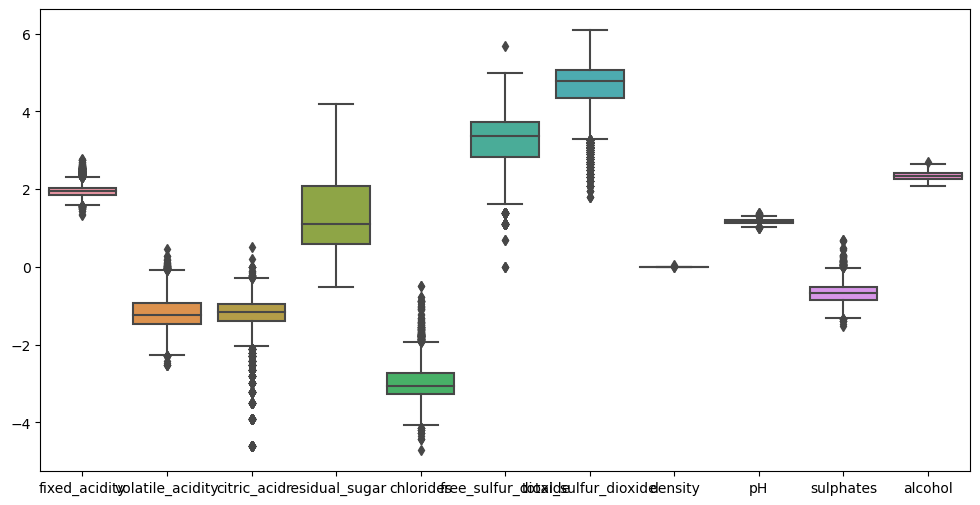

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(np.log(ozellikler_wine))

<Figure size 2000x800 with 0 Axes>

<Axes: >

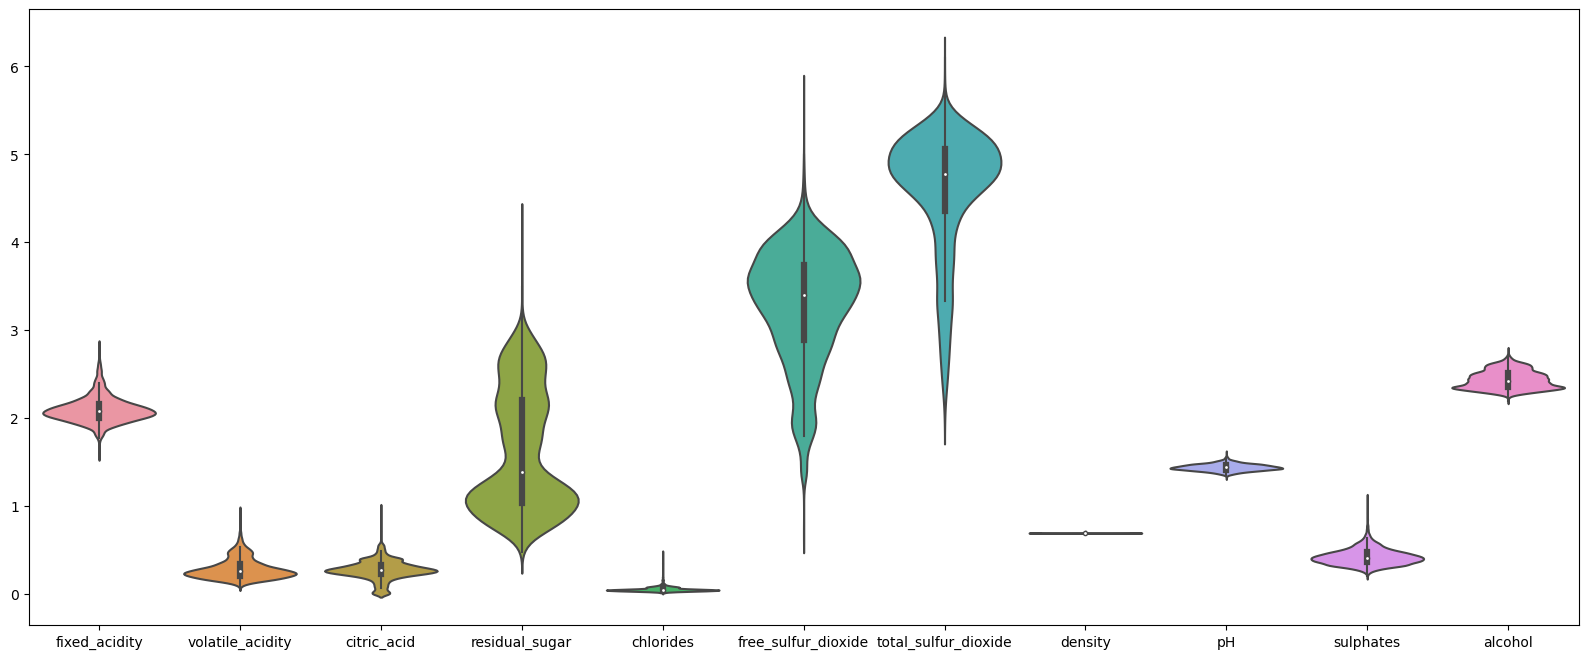

In [9]:
plt.figure(figsize=(20,8))
sns.violinplot(data=np.log(1+ozellikler_wine),scale="width")

In [10]:
cars = fetch_ucirepo(id=19)

In [11]:
cars

{'data': {'ids': None,
  'features':      buying  maint  doors persons lug_boot safety
  0     vhigh  vhigh      2       2    small    low
  1     vhigh  vhigh      2       2    small    med
  2     vhigh  vhigh      2       2    small   high
  3     vhigh  vhigh      2       2      med    low
  4     vhigh  vhigh      2       2      med    med
  ...     ...    ...    ...     ...      ...    ...
  1723    low    low  5more    more      med    med
  1724    low    low  5more    more      med   high
  1725    low    low  5more    more      big    low
  1726    low    low  5more    more      big    med
  1727    low    low  5more    more      big   high
  
  [1728 rows x 6 columns],
  'targets':       class
  0     unacc
  1     unacc
  2     unacc
  3     unacc
  4     unacc
  ...     ...
  1723   good
  1724  vgood
  1725  unacc
  1726   good
  1727  vgood
  
  [1728 rows x 1 columns],
  'original':      buying  maint  doors persons lug_boot safety  class
  0     vhigh  vhigh      2    

In [12]:
type(cars)
cars.data.targets["class"]

ucimlrepo.dotdict.dotdict

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [13]:
ozellikler_cars = cars.data.features
ozellikler_cars.info()
ozellikler_cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,2,2,small,low
freq,432,432,432,576,576,576


In [14]:
ozellikler_cars["buying"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [15]:
type(ozellikler_cars)

pandas.core.frame.DataFrame

In [16]:
target_cars=cars.data.targets
target_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


<Axes: xlabel='class', ylabel='count'>

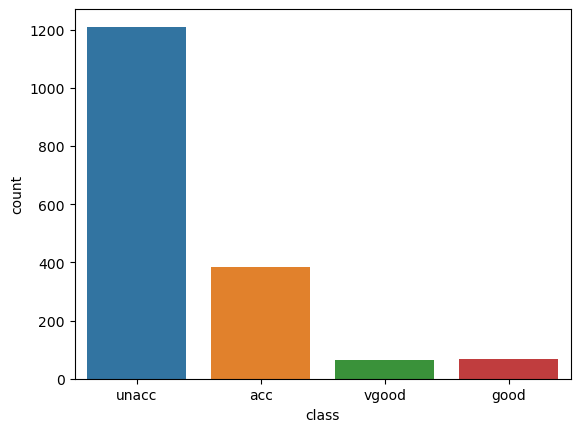

In [17]:
sns.countplot(target_cars,x="class")

In [18]:
tmp=Counter(cars.data.targets["class"])
tmp

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

([<matplotlib.patches.Wedge at 0x274cbdd2bd0>,
 [Text(-0.6472108044769336, 0.8894482416466517, 'unacc'),
  Text(0.413550280063065, -1.0193018031278867, 'acc'),
  Text(1.025931819423407, -0.3968172147155135, 'vgood'),
  Text(1.0913562359976166, -0.13762836244435522, 'good')],
 [Text(-0.35302407516923645, 0.48515358635271905, '70%'),
  Text(0.22557288003439907, -0.5559828017061199, '22%'),
  Text(0.5595991742309492, -0.2164457534811892, '4%'),
  Text(0.5952852196350635, -0.0750700158787392, '4%')])

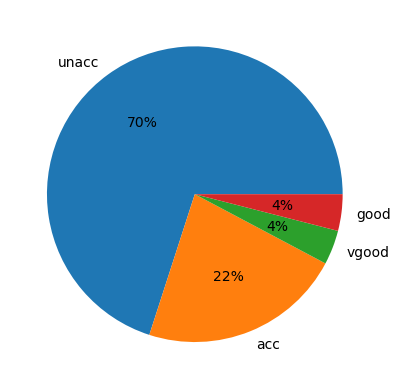

In [19]:
plt.pie(tmp.values(),labels=tmp.keys(),autopct='%.0f%%')
plt.show()

In [20]:
pd.crosstab(ozellikler_cars["maint"],target_cars["class"])

class,acc,good,unacc,vgood
maint,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


In [21]:
ct = pd.crosstab(ozellikler_cars["maint"],target_cars["class"])
ct = ct[["unacc","acc","good","vgood"]]
ct

class,unacc,acc,good,vgood
maint,,,,
high,314,105,0,13
low,268,92,46,26
med,268,115,23,26
vhigh,360,72,0,0


<Axes: xlabel='class', ylabel='maint'>

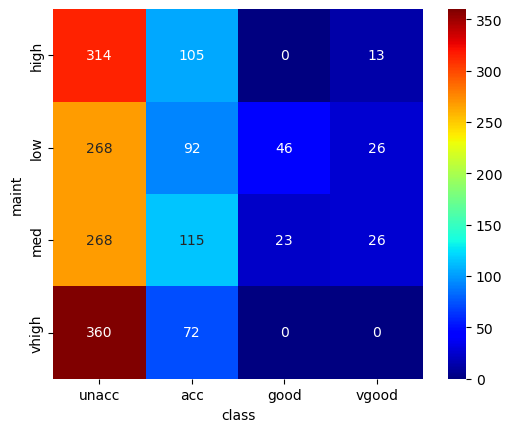

In [22]:
sns.heatmap(ct,annot=True,fmt=",.0f",square=True,cmap='jet')

<Axes: xlabel='maint'>

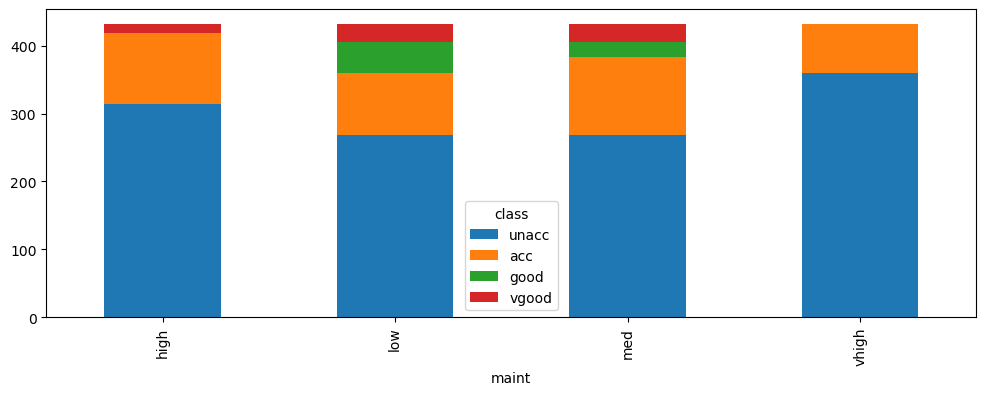

In [23]:
ct.plot(kind="bar",stacked=True,figsize=(12,4))

In [24]:
cancer = fetch_ucirepo(id=15)
cancer['data']['features']

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [25]:
tmp = Counter(cancer.data.features.Mitoses)
tmp

Counter({1: 579, 5: 6, 4: 12, 2: 35, 3: 33, 7: 9, 10: 14, 8: 8, 6: 3})

<BarContainer object of 9 artists>

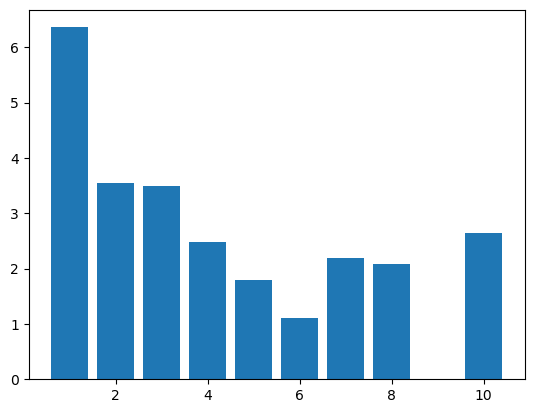

In [26]:
plt.bar(x=tmp.keys(),height=np.log(list(tmp.values())))

<Figure size 400x400 with 0 Axes>

([<matplotlib.patches.Wedge at 0x274cc3f7790>,
 [Text(-0.9438586758221146, 0.5649166310840251, '1'),
  Text(0.5457128713037167, -0.9550902900215525, '5'),
  Text(0.6211100392884821, -0.9078669060468392, '4'),
  Text(0.7976564572738816, -0.757459026066282, '2'),
  Text(0.9886011546324226, -0.48235646264919163, '3'),
  Text(1.061552677676566, -0.28828096107393686, '7'),
  Text(1.085633006247619, -0.17720320467124123, '10'),
  Text(1.097823182165751, -0.06916835041740084, '8'),
  Text(1.0999000115891386, -0.014831200430606255, '6')],
 [Text(-0.5148320049938806, 0.30813634422765007, '83'),
  Text(0.2976615661656636, -0.5209583400117559, '1'),
  Text(0.3387872941573538, -0.49520013057100315, '2'),
  Text(0.4350853403312081, -0.4131594687634265, '5'),
  Text(0.5392369934358668, -0.26310352508137724, '5'),
  Text(0.5790287332781269, -0.15724416058578372, '1'),
  Text(0.5921634579532465, -0.09665629345704067, '2'),
  Text(0.5988126448176823, -0.037728191136764094, '1'),
  Text(0.59994546086680

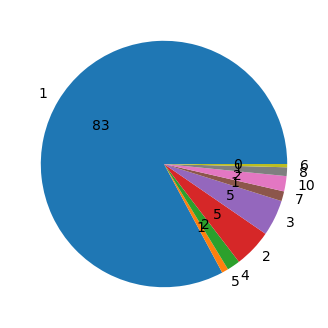

In [27]:
plt.figure(figsize=(4,4))
plt.pie(tmp.values(),labels=tmp.keys(),autopct="%.0f")
plt.show()

In [28]:
ct = pd.crosstab(cancer.data.features["Clump_thickness"],cancer.data.features["Uniformity_of_cell_shape"])
ct

Uniformity_of_cell_shape,1,2,3,4,5,6,7,8,9,10
Clump_thickness,,,,,,,,,,
1,121,8,13,1,0,0,0,2,0,0
2,42,3,2,1,0,0,1,0,0,1
3,76,15,3,4,4,2,3,1,0,0
4,52,9,4,5,3,3,1,3,0,0
5,52,17,15,9,7,8,4,3,2,13
6,8,2,6,2,2,2,5,1,0,6
7,0,2,3,6,1,5,3,1,0,2
8,1,0,3,9,6,3,3,7,3,11
9,0,1,0,0,3,0,1,3,1,5


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Uniformity_of_cell_shape', ylabel='Clump_thickness'>

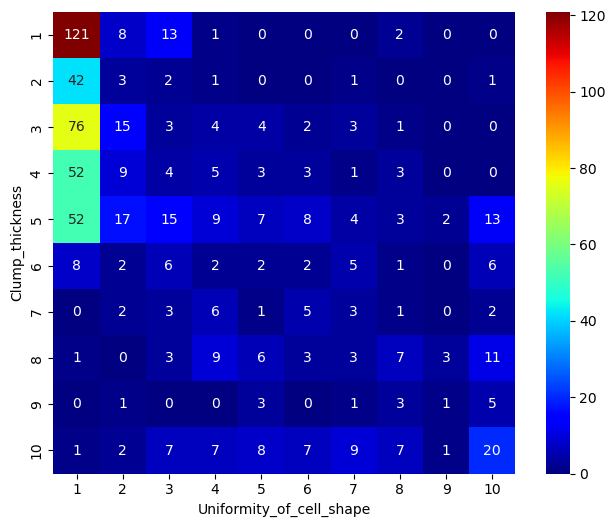

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(ct,square=True,annot=True,fmt=',.0f',cmap='jet')

<Axes: xlabel='Uniformity_of_cell_shape'>

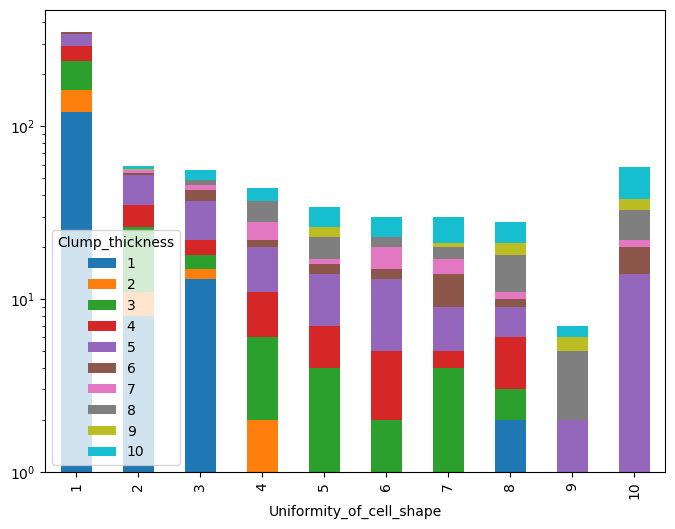

In [30]:
ct.T.plot(kind='bar',stacked=True,figsize=(8,6),logy=True)

In [31]:
aapl = yf.download("AAPL")
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087116,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52292200
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500


<Axes: ylabel='Frequency'>

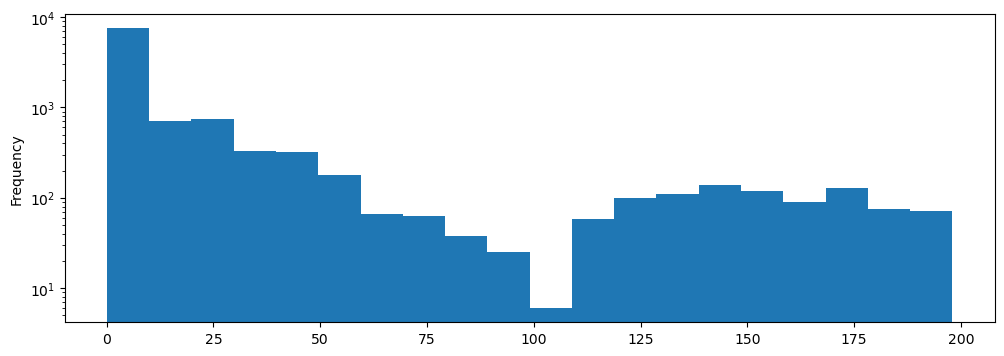

In [32]:
aapl['Open'].plot(kind="hist",bins=20,figsize=(12,4),log=True)

<Axes: >

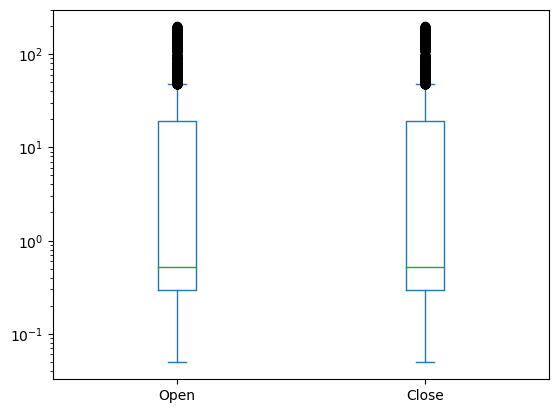

In [33]:
aapl[['Open','Close']].plot(kind='box',logy=True)

<Axes: xlabel='Open', ylabel='Close'>

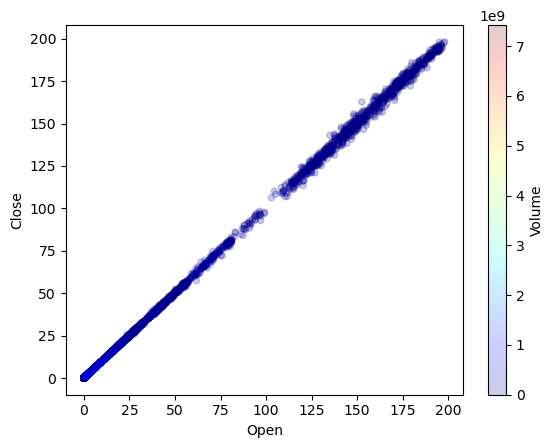

In [34]:
aapl.plot.scatter(x='Open',y='Close',c='Volume',cmap='jet',alpha=0.2)

In [35]:
googl = yf.download('GOOGL',start='2020-01-01')
googl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2024-02-21,141.449997,142.690002,140.679993,142.550003,142.550003,23315700
2024-02-22,144.929993,145.000000,142.800003,144.089996,144.089996,27191900
2024-02-23,143.669998,144.679993,143.429993,143.960007,143.960007,19475800


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x850 with 6 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


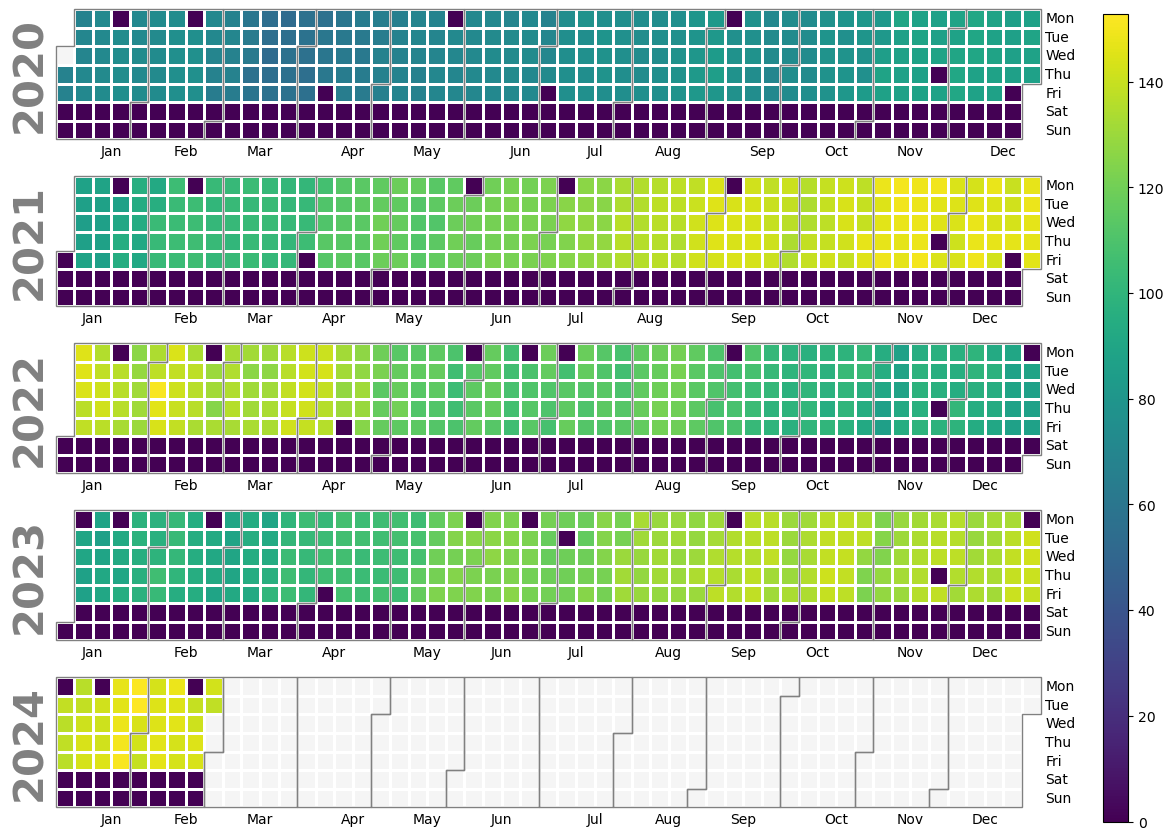

In [36]:
import calplot
calplot.calplot(googl['Open'])

In [37]:
import yfinance as yf

def get_ts(sembol):
    data=yf.download(sembol, start="2022-01-01",end="2022-04-30")
    data.insert(0,"id",sembol)
    data.reset_index(inplace=True)
    return data

def set_ts(semboller):
    merged_ts = pd.DataFrame()
    for sembol in semboller:
        merged_ts=pd.concat([merged_ts,get_ts(sembol)])
    return merged_ts

semboller=["WMT","NKE","AAPL","TSLA","META","NVDA","MRT","FFIE"]

ts_dataframes=set_ts(semboller)
ts_dataframes

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,id,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,WMT,48.000000,48.263332,47.669998,48.216667,46.757282,20706600
1,2022-01-04,WMT,48.013332,48.380001,47.253334,47.333332,45.900681,33930000
2,2022-01-05,WMT,47.616669,48.650002,47.580002,47.973331,46.521309,35418000
3,2022-01-06,WMT,47.873333,48.213333,47.466667,47.840000,46.392017,21828900
4,2022-01-07,WMT,47.833332,48.453335,47.653332,48.296665,46.834858,19723500
...,...,...,...,...,...,...,...,...
77,2022-04-25,FFIE,292.000000,299.600006,283.200012,284.799988,284.799988,24751
78,2022-04-26,FFIE,291.200012,291.200012,148.000000,248.000000,248.000000,212230
79,2022-04-27,FFIE,230.399994,248.800003,229.600006,239.199997,239.199997,30355
80,2022-04-28,FFIE,246.399994,246.399994,212.800003,229.600006,229.600006,24735


In [38]:
from ydata_profiling import ProfileReport
profile = ProfileReport(ozellikler_wine)

In [44]:
!mkdir outputs #creates a folder named "outputs"

A subdirectory or file outputs already exists.
Error occurred while processing: outputs.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


In [43]:
profile.to_file("outputs/ozellikler-wine.html") 
#creates an html page in folder "outputs" which shows detailed report about the dataset

C:\Users\kyse1\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
ozellikler_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [48]:
ozellikler_wine.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8


In [49]:
ozellikler_wine.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6497, dtype: bool

In [53]:
ozellikler_wine.duplicated(keep='last')

0        True
1       False
2       False
3       False
4       False
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6497, dtype: bool

In [59]:
ozellikler_wine[ozellikler_wine.duplicated()].shape

(1179, 11)

In [62]:
ozellikler_wine[ozellikler_wine.duplicated()]
ozellikler_wine.loc[456:462]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000
...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
456,8.9,0.590,0.39,2.30,0.095,5.0,22.0,0.9986,3.37,0.58,10.3
457,9.2,0.630,0.21,2.70,0.097,29.0,65.0,0.9988,3.28,0.58,9.6
458,10.4,0.330,0.63,2.80,0.084,5.0,22.0,0.9998,3.26,0.74,11.2
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.0008,3.25,0.57,9.0
460,9.2,0.430,0.52,2.30,0.083,14.0,23.0,0.9976,3.35,0.61,11.3
461,8.3,0.615,0.22,2.60,0.087,6.0,19.0,0.9982,3.26,0.61,9.3
462,11.0,0.260,0.68,2.55,0.085,10.0,25.0,0.9970,3.18,0.61,11.8
